In [31]:
import cdsapi
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import regionmask
newlat=np.arange(56,61, 0.1)
newlon=np.arange(20,28.4,0.1)

kelvin=273.15

In [32]:
## out: 0=mean, 1=stdev, 2=count
def mean_stdev_dim(datain, dim, out):
    varsum = datain.sum(dim=dim, skipna=True, min_count=1)
    varcount = datain.count(dim=dim)
    mean = varsum/varcount
    difs2 = np.square(datain - mean)
    difs2_sum = difs2.sum(dim=dim, skipna=True, min_count=2)
    stdev = np.sqrt(difs2_sum / (varcount - 1))
    if out == 0: return mean
    if out == 1: return stdev
    if out == 2: return varcount

In [33]:
def ds_EST(ds): 
    ds_dense=ds.interp(lat=newlat,lon=newlon)
    # Get country mask 
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['lon'], ds_dense['lat'])
    
    
    # Define water regions by lat/lon ranges
    water_regions = [
        #iga pixli rida peipsil eraldi
        {"lat_range": (59, 59.1), "lon_range": (27, 28)},  
        {"lat_range": (58.9, 59), "lon_range": (26.9, 28)},
        {"lat_range": (58.8, 58.9), "lon_range": (27, 28)},
        {"lat_range": (58.7, 58.8), "lon_range": (27, 28)},
        {"lat_range": (58.6, 58.7), "lon_range": (27.2, 28)},
        {"lat_range": (58.5, 58.6), "lon_range": (27.3, 28)},
        {"lat_range": (58.4, 58.5), "lon_range": (27.4, 28)},
        
        
       #võrtsjärv 
        #{"lat_range": (58.3, 58.4), "lon_range": (26, 26.2)},
        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(newlat), len(newlon)), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (newlat >= region["lat_range"][0]) & (newlat <= region["lat_range"][1])
        lon_mask = (newlon >= region["lon_range"][0]) & (newlon <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False  # Set water regions to False
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == True))
    return ds_EST
    

def ds_EST_koik(ds): 
    ds_dense=ds.interp(lat=newlat,lon=newlon)
    # Get country mask 
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['lon'], ds_dense['lat'])

    ds_EST = ds_dense.where((est_mask == est_ind))
    return ds_EST


def ds_EST_era_koik(ds):
    #ds_dense=ds.interp(latitude=newlat,longitude=newlon)
    ds_dense=ds
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])
    ds_EST = ds_dense.where((est_mask == est_ind))
    return ds_EST
    

def ds_EST_era(ds):
    #ds_dense=ds.interp(latitude=newlat,longitude=newlon)
    ds_dense=ds
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])
    
    # Define water regions by lat/lon ranges
    water_regions = [
        #iga pixli rida peipsil eraldi
        {"lat_range": (59, 59.1), "lon_range": (27, 28)},  
        {"lat_range": (58.9, 59), "lon_range": (26.9, 28)},
        {"lat_range": (58.8, 58.9), "lon_range": (27, 28)},
        {"lat_range": (58.7, 58.8), "lon_range": (27, 28)},
        {"lat_range": (58.6, 58.7), "lon_range": (27.2, 28)},
        {"lat_range": (58.5, 58.6), "lon_range": (27.3, 28)},
        {"lat_range": (58.4, 58.5), "lon_range": (27.4, 28)},
        
        
       #võrtsjärv 
        #{"lat_range": (58.3, 58.4), "lon_range": (26, 26.2)},
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(ds_dense['latitude']), len(ds_dense['longitude'])), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (ds_dense['latitude'] >= region["lat_range"][0]) & (ds_dense['latitude'] <= region["lat_range"][1])
        lon_mask = (ds_dense['longitude'] >= region["lon_range"][0]) & (ds_dense['longitude'] <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False  # Set water regions to False
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == True))
    return ds_EST


def ds_EST_era_uksik_piksel(ds):
    #ds_dense=ds.interp(latitude=newlat,longitude=newlon)
    ds_dense=ds
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (58.8, 58.85), "lon_range": (26.9, 26.95)},

        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(ds_dense['latitude']), len(ds_dense['longitude'])), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (ds_dense['latitude'] >= region["lat_range"][0]) & (ds_dense['latitude'] <= region["lat_range"][1])
        lon_mask = (ds_dense['longitude'] >= region["lon_range"][0]) & (ds_dense['longitude'] <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST

def ds_EST_era_voru(ds):
    #ds_dense=ds.interp(latitude=newlat,longitude=newlon)
    ds_dense=ds
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (57.8, 57.85), "lon_range": (27, 27.05)},

        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(ds_dense['latitude']), len(ds_dense['longitude'])), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (ds_dense['latitude'] >= region["lat_range"][0]) & (ds_dense['latitude'] <= region["lat_range"][1])
        lon_mask = (ds_dense['longitude'] >= region["lon_range"][0]) & (ds_dense['longitude'] <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST


def ds_EST_era_laane_nigula(ds):
    #ds_dense=ds.interp(latitude=newlat,longitude=newlon)
    ds_dense=ds
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (59, 59.05), "lon_range": (23.9, 23.95)},

        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(ds_dense['latitude']), len(ds_dense['longitude'])), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (ds_dense['latitude'] >= region["lat_range"][0]) & (ds_dense['latitude'] <= region["lat_range"][1])
        lon_mask = (ds_dense['longitude'] >= region["lon_range"][0]) & (ds_dense['longitude'] <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST


def ds_EST_uksik_piksel(ds):
    ds_dense=ds.interp(lat=newlat,lon=newlon)
    # Get country mask 
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['lon'], ds_dense['lat'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (58.8, 58.85), "lon_range": (26.9, 26.95)},

        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(newlat), len(newlon)), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (newlat >= region["lat_range"][0]) & (newlat <= region["lat_range"][1])
        lon_mask = (newlon >= region["lon_range"][0]) & (newlon <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST

def ds_EST_voru(ds):
    ds_dense=ds.interp(lat=newlat,lon=newlon)
    # Get country mask 
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['lon'], ds_dense['lat'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (57.8, 57.85), "lon_range": (27, 27.05)},

        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(newlat), len(newlon)), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (newlat >= region["lat_range"][0]) & (newlat <= region["lat_range"][1])
        lon_mask = (newlon >= region["lon_range"][0]) & (newlon <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST


def ds_EST_laane_nigula(ds):
    ds_dense=ds.interp(lat=newlat,lon=newlon)
    # Get country mask 
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['lon'], ds_dense['lat'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (59, 59.05), "lon_range": (23.9, 23.95)},

        
    ]

    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(newlat), len(newlon)), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (newlat >= region["lat_range"][0]) & (newlat <= region["lat_range"][1])
        lon_mask = (newlon >= region["lon_range"][0]) & (newlon <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST



def ds_EST_era_uksikud_pikslid(ds):
    #ds_dense=ds.interp(latitude=newlat,longitude=newlon)
    ds_dense=ds
    countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 
    
    est_ind = countries.abbrevs.index('EST') 
    est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])
    
    # Define water regions by lat/lon ranges
    water_regions = [

        {"lat_range": (58.8, 58.85), "lon_range": (26.9, 26.95)},
        {"lat_range": (59, 59.05), "lon_range": (23.9, 23.95)},
        {"lat_range": (57.8, 57.85), "lon_range": (27, 27.05)},

        
    ]
    # Create an empty land mask (1 = land, 0 = water)
    land_mask = np.ones((len(newlat), len(newlon)), dtype=bool)

    # Apply water regions to the mask
    for region in water_regions:
        lat_mask = (newlat >= region["lat_range"][0]) & (newlat <= region["lat_range"][1])
        lon_mask = (newlon >= region["lon_range"][0]) & (newlon <= region["lon_range"][1])

        # Use broadcasting to apply the mask
        land_mask[np.ix_(lat_mask, lon_mask)] = False 
    ds_EST = ds_dense.where((est_mask == est_ind) & (land_mask == False))
    return ds_EST
        

In [34]:
#andmete lugemine


asi="CMIP6_Est_tasmin_v3.nc" # Update with your actual file path
ds_min=xr.open_dataset(asi)


asi="eramin.nc" # Update with your actual file path
era_min=xr.open_dataset(asi)


asi="eramax.nc" # Update with your actual file path
era_max=xr.open_dataset(asi)

asi="eramean.nc" # Update with your actual file path
era_mean=xr.open_dataset(asi)

all_members=set(ds_min.member.values)




In [35]:
ssp="ssp585"
ds_masked=ds_EST_era(era_min)
ds_masked=ds_masked.isel(time=slice(0, 13149)) 
era_min_stdev=mean_stdev_dim(ds_masked,["time","latitude","longitude"],1)
era_min_mean=mean_stdev_dim(ds_masked,["time","latitude","longitude"],0)


print("keskmine - era keskmine")
# stdev ja mean üle kogu aja
for member in all_members:
    ds_member = ds_min.sel(member=member, SSP=ssp)
    #riigi mask

    data_masked = ds_EST(ds_member)
    #kuni 2014
    data_masked=data_masked.isel(time=slice(0, 13149))   
    
    stdev=mean_stdev_dim(data_masked.tasmin,["time","lat","lon"],1)
    mean=mean_stdev_dim(data_masked.tasmin,["time","lat","lon"],0)
    print(member,mean.values-era_min_mean.t2m.values)
    
#esimesel 2 pole historicali, viimasel kahel keskmine temp erineb üle 3 kraadi
members_to_remove = {"EC-Earth3-AerChem_r1i1p1f1", "FGOALS-f3-L_r1i1p1f1","BCC-CSM2-MR_r1i1p1f1","TaiESM1_r1i1p1f1","ACCESS-CM2_r1i1p1f1"}  # List the members to remove

common_members= all_members-members_to_remove

keskmine - era keskmine
EC-Earth3-AerChem_r1i1p1f1 nan
INM-CM4-8_r1i1p1f1 -1.2844363229825149
CNRM-ESM2-1_r1i1p1f2 1.5040919289365888
CMCC-ESM2_r1i1p1f1 1.3255343480169017
BCC-CSM2-MR_r1i1p1f1 -3.427933045148791
CanESM5_r1i1p1f1 0.6937138445589426
NESM3_r1i1p1f1 0.6367468767580249
EC-Earth3-Veg-LR_r1i1p1f1 -1.277897482193282
NorESM2-MM_r1i1p1f1 -0.581317115813988
CNRM-CM6-1-HR_r1i1p1f2 -2.465939179821362
MPI-ESM1-2-LR_r1i1p1f1 -0.42404828067896005
CNRM-CM6-1_r1i1p1f2 0.36111470519836075
MIROC6_r1i1p1f1 -0.0829695663765051
IPSL-CM6A-LR_r1i1p1f1 0.1528296701295062
INM-CM5-0_r1i1p1f1 -2.309309866469107
AWI-CM-1-1-MR_r1i1p1f1 -0.09909571915926563
FGOALS-f3-L_r1i1p1f1 nan
MRI-ESM2-0_r1i1p1f1 1.1453306730538202
EC-Earth3-CC_r1i1p1f1 0.28542637334339815
MIROC-ES2L_r1i1p1f2 -0.32556934951162475
KIOST-ESM_r1i1p1f1 -2.0865461352146326
NorESM2-LM_r1i1p1f1 0.6890314914797386
ACCESS-CM2_r1i1p1f1 -3.1944432614810125
GFDL-ESM4_r1i1p1f1 -2.0544903776489605
TaiESM1_r1i1p1f1 4.4555903115306705


In [36]:
#troopilineöö
ssp="ssp585"
days_per_year_datasets = []
max_min_year_datasets=[]
tropical_nights_per_year_datasets = []
#andmed riigi kujul ainult
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP=ssp)
    
    
    data_masked=ds_EST(ds_member)
    
    #finding the max temp over the whole area   
    max_min_temp=data_masked.tasmin.groupby("time.year").max(dim=["time", "lat", "lon"])
    
    max_min_year_datasets.append(max_min_temp)
    
    # Apply the condition: tasmin > 20 (boolean mask) data is in kelvins
    days_above_20 = (data_masked.tasmin >= (20+kelvin))
    
    
    
     # Count how many tropical nights per grid cell per year
    tropical_nights_per_grid_per_year = days_above_20.groupby("time.year").sum(dim="time")
    
    
    
    # Reduce over lat/lon to check if ANY grid cell exceeded 20°C on each day
    days_per_day = days_above_20.any(dim=["lat", "lon"])
    
    days_per_day_mean = days_above_20.mean(dim=["lat", "lon"])
    
    
    # Group by year and count the number of True values (days above 20°C)
    days_per_year = days_per_day.groupby("time.year").sum()
    
    days_per_year_mean = days_per_day_mean.groupby("time.year").sum()
    
    #add member data
    days_per_year = days_per_year.assign_coords(member=member)
    days_per_year_mean= days_per_year_mean.assign_coords(member=member)
        
    days_per_year_datasets.append(days_per_year)
    tropical_nights_per_year_datasets.append(days_per_year_mean)
 
    
#grid pixels millega jagan, et saada teada palju keskmiselt troopilisi öid tuleb
grid_cmip=data_masked.sel(time="2010-07-07")
num_pixels_cmip = grid_cmip.notnull().sum()
num_pixels_cmip=num_pixels_cmip.tasmin.values

In [37]:
# Restrict each dataset to only include data up to 2022
datasets_filtered = [ds.where(ds.year <= 2022, drop=True) for ds in days_per_year_datasets]

datasets_filtered_max_min=[ds.where(ds.year<=2022, drop=True) for ds in max_min_year_datasets]

datasets_filtered_grid=[ds.where(ds.year<=2022, drop=True) for ds in tropical_nights_per_year_datasets]

# Concatenate along a new dimension ("dataset")
combined_grid_median = xr.concat(datasets_filtered_grid, dim="dataset",coords="minimal",compat="override")

# Compute the median along the "dataset" dimension
days_per_year_grid_median = combined_grid_median.median(dim="dataset")


# Concatenate along a new dimension ("dataset")
combined = xr.concat(datasets_filtered, dim="dataset",coords="minimal",compat="override")

# Compute the median along the "dataset" dimension
median_days_per_year = combined.median(dim="dataset")

In [38]:
ds_masked=ds_EST_era(era_min)
ds_masked = ds_masked.sel(time=ds_masked.time.dt.year < 2023)
#### siin tuelb grid millega jagan ,et saada teada palju keskmiselt neid troopilisi öid tuleb
grid_era=ds_masked.sel(time="2010-07-07")
num_pixels_era = grid_era.notnull().sum()
num_pixels_era=num_pixels_era.t2m.values

# Apply the condition: tasmin > 20 (boolean mask) data is in kelvins
days_above_20 = (ds_masked.t2m >= (20+kelvin))

# Reduce over lat/lon to check if ANY grid cell exceeded 20°C on each day
days_per_day = days_above_20.any(dim=["longitude", "latitude"])

days_per_day_mean = days_above_20.mean(dim=["longitude", "latitude"])

# Group by year and count the number of True values (days above 20°C)
eramin_days_per_year = days_per_day.groupby("time.year").sum()

eramin_days_per_year_mean = days_per_day_mean.groupby("time.year").sum()

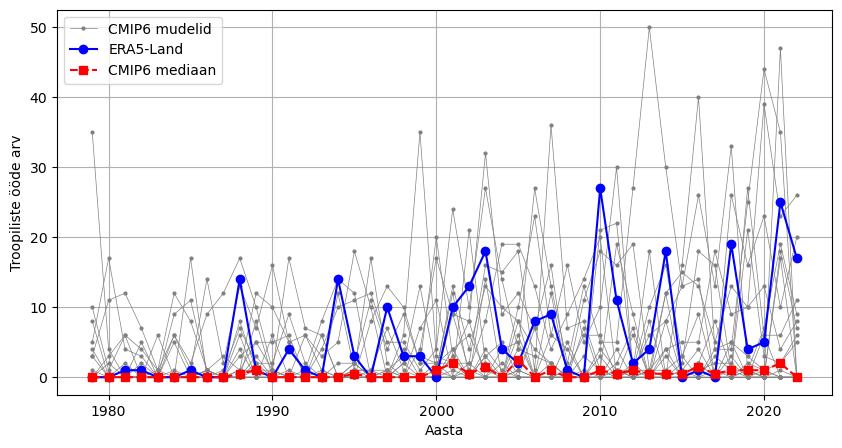

In [39]:
# Assuming you have two xarrays: (eramin_days_per_year(eras) and median_days_per_year(CMIP6)
fig, ax = plt.subplots(figsize=(10, 5))


for i, ds in enumerate(datasets_filtered) :
    if i == 0:
        ax.plot(ds.year, ds ,marker="o",label ="CMIP6 mudelid",linestyle="-", color="grey", linewidth=0.5,markersize=2)
        
    else:
        ax.plot(ds.year, ds ,marker="o", linestyle="-", color="grey", linewidth=0.5,markersize=2)
# Plot the first dataset
ax.plot(eramin_days_per_year.year, eramin_days_per_year , label="ERA5-Land", marker="o", linestyle="-", color="blue")

# Plot the second dataset
ax.plot(median_days_per_year.year, median_days_per_year, label="CMIP6 mediaan", marker="s", linestyle="--", color="red")




# Labels and legend
ax.set_xlabel("Aasta")
ax.set_ylabel("Troopiliste ööde arv")
ax.set_title("")
ax.legend(loc='upper left',fontsize=10)
ax.grid(True)

# Show the plot
#plt.savefig("Troopilised_ööde_võrdlus.png", dpi=300, bbox_inches="tight")
plt.show()

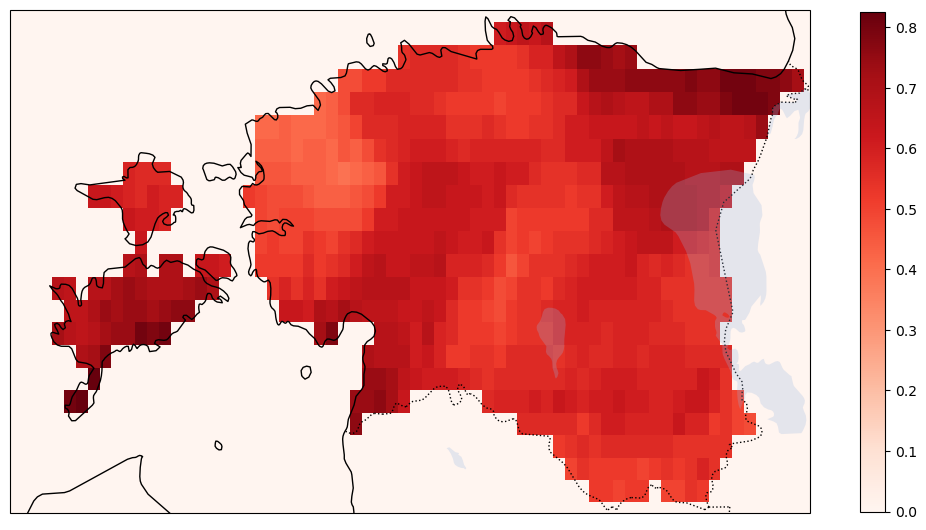

In [40]:
days_per_day_map_list=[]
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP="ssp585")
    ds_member=ds_member.sel(time=slice("2000","2022"))
    data_masked=ds_EST_koik(ds_member)
    
    days_above_20 = (data_masked >= (20+kelvin))
    days_per_day_map = days_above_20.sum(dim="time")
    
    days_per_day_map = days_per_day_map.assign_coords(member=member)
    
    days_per_day_map_list.append(days_per_day_map)
    

nights_map_combined=xr.concat(days_per_day_map_list, dim="dataset",coords="minimal",compat="override")
#siin peab olema mean, sest kui võtan iga gridi mediani siis see nullib ära palju 
nights_map_median=nights_map_combined.tasmin.median(dim="dataset")
nights_map_median=nights_map_median/23
# pilt väiksemaks nende koordinaatide järgi
extent = [21.5, 28.2, 57.5, 59.7]  # Adjust if needed

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([1,1,1,1],projection=ccrs.Mercator())
#see asi teeb pildi väiksemaks
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.coastlines()
#siin cbar:kwargs shrink muudab värvi tulba sama suuremks kui pilt 
nights_map_median.plot(transform=ccrs.PlateCarree(), cmap = 'Reds',cbar_kwargs={"shrink": 0.5, "label": ""})

plt.title("", fontsize = 20)
fig.patch.set_facecolor('xkcd:white')
#plt.savefig("CMIP6 mudelite mediaan troopilised ööd 2000-2022.png", dpi=300, bbox_inches="tight")
plt.show()

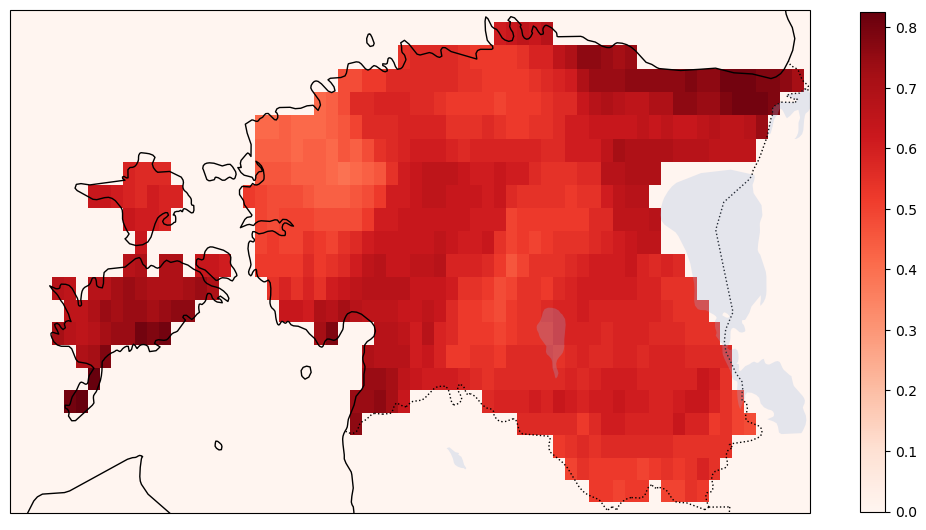

In [41]:
days_per_day_map_list=[]
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP="ssp585")
    ds_member=ds_member.sel(time=slice("2000","2022"))
    data_masked=ds_EST(ds_member)
    
    days_above_20 = (data_masked >= (20+kelvin))
    days_per_day_map = days_above_20.sum(dim="time")
    
    days_per_day_map = days_per_day_map.assign_coords(member=member)
    
    days_per_day_map_list.append(days_per_day_map)
    

nights_map_combined=xr.concat(days_per_day_map_list, dim="dataset",coords="minimal",compat="override")
#siin peab olema mean, sest kui võtan iga gridi mediani siis see nullib ära palju 
nights_map_median=nights_map_combined.tasmin.median(dim="dataset")
nights_map_median=nights_map_median/23
# pilt väiksemaks nende koordinaatide järgi
extent = [21.5, 28.2, 57.5, 59.7]  # Adjust if needed

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([1,1,1,1],projection=ccrs.Mercator())
#see asi teeb pildi väiksemaks
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.coastlines()
#siin cbar:kwargs shrink muudab värvi tulba sama suuremks kui pilt 
nights_map_median.plot(transform=ccrs.PlateCarree(), cmap = 'Reds',cbar_kwargs={"shrink": 0.5, "label": ""})

plt.title("", fontsize = 20)
fig.patch.set_facecolor('xkcd:white')
#plt.savefig("CMIP6 mudelite mediaan troopilised ööd 2000-2022 peipsita.png", dpi=300, bbox_inches="tight")
plt.show()

In [42]:
#troopilineöö
ssp="ssp585"
days_per_year_datasets = []
max_min_year_datasets=[]
#andmed riigi kujul ainult
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP=ssp)
    
    
    data_masked=ds_EST(ds_member)
    
    #finding the max temp over the whole area   
    max_min_temp=data_masked.tasmin.groupby("time.year").max(dim=["time", "lat", "lon"])
    
    max_min_year_datasets.append(max_min_temp)
    
    # Apply the condition: tasmin > 20 (boolean mask) data is in kelvins
    days_above_20 = (data_masked.tasmin >= (20+kelvin))
    
    # Reduce over lat/lon to check if ANY grid cell exceeded 20°C on each day
    days_per_day = days_above_20.any(dim=["lat", "lon"])
    
    
    
    # Group by year and count the number of True values (days above 20°C)
    days_per_year = days_per_day.groupby("time.year").sum()
    #add member data
    days_per_year = days_per_year.assign_coords(member=member)
    
    days_per_year_datasets.append(days_per_year)
    



# Concatenate along a new dimension ("dataset")
combined_ssp585 = xr.concat(days_per_year_datasets, dim="dataset",coords="minimal",compat="override")

# Compute the median along the "dataset" dimension
median_days_per_year_ssp585 = combined_ssp585.median(dim="dataset")


q10_ssp585 = combined_ssp585.quantile(0.1, dim="dataset")  # 10th percentile
q90_ssp585 = combined_ssp585.quantile(0.9, dim="dataset")  # 90th percentile

#############################################################################################
#troopilineöö
ssp="ssp370"
days_per_year_datasets_370 = []
max_min_year_datasets=[]
#andmed riigi kujul ainult
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP=ssp)
    
    
    data_masked=ds_EST(ds_member)
    
    #finding the max temp over the whole area   
    max_min_temp=data_masked.tasmin.groupby("time.year").max(dim=["time", "lat", "lon"])
    
    max_min_year_datasets.append(max_min_temp)
    
    # Apply the condition: tasmin > 20 (boolean mask) data is in kelvins
    days_above_20 = (data_masked.tasmin >= (20+kelvin))
    
    # Reduce over lat/lon to check if ANY grid cell exceeded 20°C on each day
    days_per_day = days_above_20.any(dim=["lat", "lon"])
    
    
    
    # Group by year and count the number of True values (days above 20°C)
    days_per_year = days_per_day.groupby("time.year").sum()
    #add member data
    days_per_year = days_per_year.assign_coords(member=member)
    
    days_per_year_datasets_370.append(days_per_year)
    



# Concatenate along a new dimension ("dataset")
combined_ssp370 = xr.concat(days_per_year_datasets_370, dim="dataset",coords="minimal",compat="override")

# Compute the median along the "dataset" dimension
median_days_per_year_ssp370 = combined_ssp370.median(dim="dataset")


q10_ssp370 = combined_ssp370.quantile(0.1, dim="dataset")  # 10th percentile
q90_ssp370 = combined_ssp370.quantile(0.9, dim="dataset")  # 90th percentile


###############################################################################
#troopilineöö
ssp="ssp245"
days_per_year_datasets = []
max_min_year_datasets=[]
#andmed riigi kujul ainult
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP=ssp)
    
    
    data_masked=ds_EST(ds_member)
    
    #finding the max temp over the whole area   
    max_min_temp=data_masked.tasmin.groupby("time.year").max(dim=["time", "lat", "lon"])
    
    max_min_year_datasets.append(max_min_temp)
    
    # Apply the condition: tasmin > 20 (boolean mask) data is in kelvins
    days_above_20 = (data_masked.tasmin >= (20+kelvin))
    
    # Reduce over lat/lon to check if ANY grid cell exceeded 20°C on each day
    days_per_day = days_above_20.any(dim=["lat", "lon"])
    
    
    
    # Group by year and count the number of True values (days above 20°C)
    days_per_year = days_per_day.groupby("time.year").sum()
    #add member data
    days_per_year = days_per_year.assign_coords(member=member)
    
    days_per_year_datasets.append(days_per_year)
    



# Concatenate along a new dimension ("dataset")
combined_ssp245 = xr.concat(days_per_year_datasets, dim="dataset",coords="minimal",compat="override")

# Compute the median along the "dataset" dimension
median_days_per_year_ssp245 = combined_ssp245.median(dim="dataset")


q10_ssp245 = combined_ssp245.quantile(0.1, dim="dataset")  # 10th percentile
q90_ssp245 = combined_ssp245.quantile(0.9, dim="dataset")  # 90th percentile

###########################################################################
#troopilineöö
ssp="ssp126"
days_per_year_datasets = []
max_min_year_datasets=[]
#andmed riigi kujul ainult
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP=ssp)
    
    
    data_masked=ds_EST(ds_member)
    
    #finding the max temp over the whole area   
    max_min_temp=data_masked.tasmin.groupby("time.year").max(dim=["time", "lat", "lon"])
    
    max_min_year_datasets.append(max_min_temp)
    
    # Apply the condition: tasmin > 20 (boolean mask) data is in kelvins
    days_above_20 = (data_masked.tasmin >= (20+kelvin))
    
    # Reduce over lat/lon to check if ANY grid cell exceeded 20°C on each day
    days_per_day = days_above_20.any(dim=["lat", "lon"])
    
    
    
    # Group by year and count the number of True values (days above 20°C)
    days_per_year = days_per_day.groupby("time.year").sum()
    #add member data
    days_per_year = days_per_year.assign_coords(member=member)
    
    days_per_year_datasets.append(days_per_year)
    



# Concatenate along a new dimension ("dataset")
combined_ssp126 = xr.concat(days_per_year_datasets, dim="dataset",coords="minimal",compat="override")

# Compute the median along the "dataset" dimension
median_days_per_year_ssp126 = combined_ssp126.median(dim="dataset")

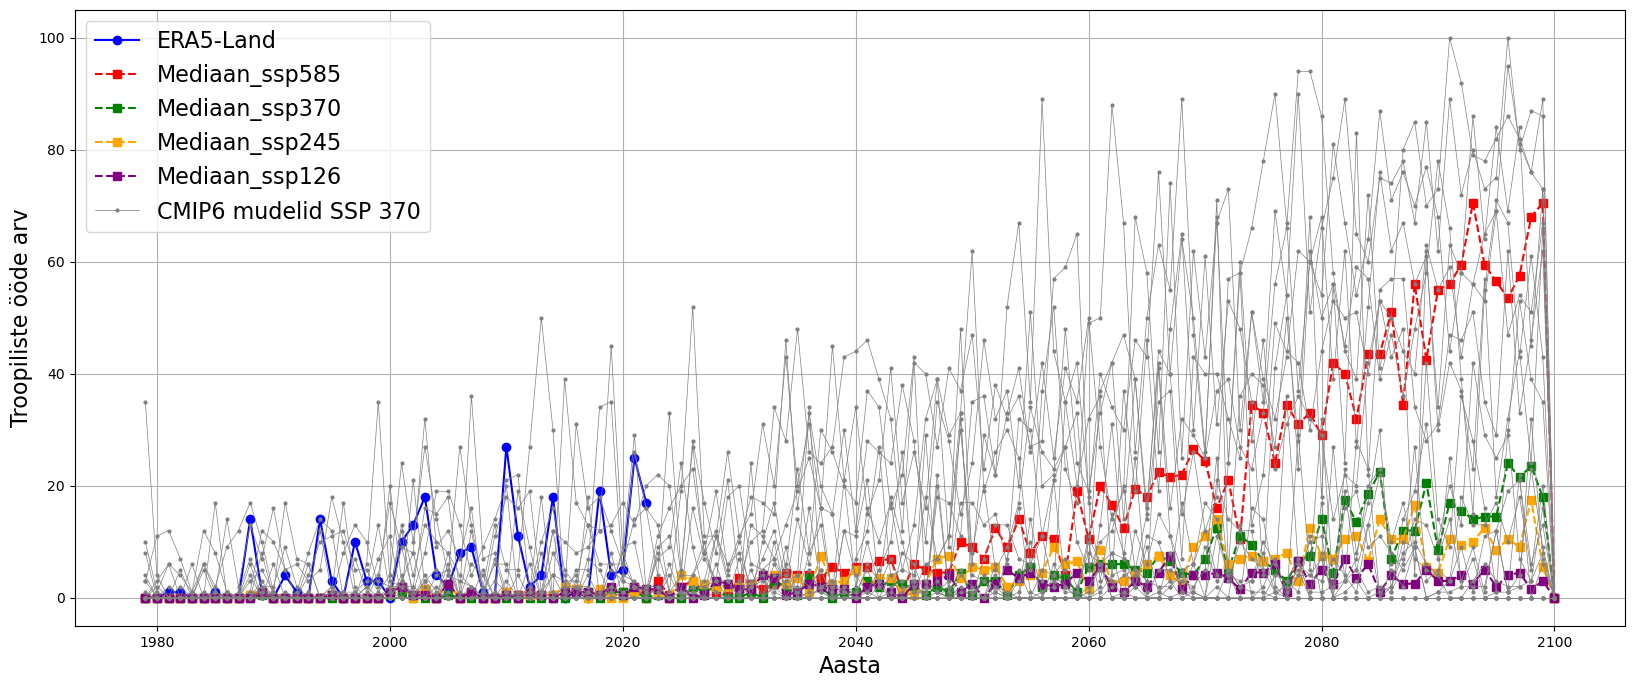

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the first dataset
ax.plot(eramin_days_per_year.year, eramin_days_per_year, label="ERA5-Land", marker="o", linestyle="-", color="blue")

#ssp585
ax.plot(median_days_per_year_ssp585.year, median_days_per_year_ssp585, label="Mediaan_ssp585", marker="s", linestyle="--", color="red")

#ssp370
ax.plot(median_days_per_year_ssp370.year, median_days_per_year_ssp370, label="Mediaan_ssp370", marker="s", linestyle="--", color="green")


#ssp245
ax.plot(median_days_per_year_ssp245.year, median_days_per_year_ssp245 , label="Mediaan_ssp245", marker="s", linestyle="--", color="orange")

#ssp126
ax.plot(median_days_per_year_ssp126.year, median_days_per_year_ssp126, label="Mediaan_ssp126", marker="s", linestyle="--", color="purple")

for i, ds in enumerate(days_per_year_datasets_370) :
    if i == 0:
        ax.plot(ds.year, ds ,marker="o",label ="CMIP6 mudelid SSP 370",linestyle="-", color="grey", linewidth=0.5,markersize=2)
        
    else:
        ax.plot(ds.year, ds ,marker="o", linestyle="-", color="grey", linewidth=0.5,markersize=2)


# Labels and legend
ax.set_xlabel("Aasta", fontsize=16)
ax.set_ylabel("Troopiliste ööde arv", fontsize=16)
plt.legend(fontsize=16)
ax.grid(True)

#plt.savefig("Ennustus.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

In [44]:
Mustvee_file_path = "Mustvee.xlsx"  # Update with your actual file path
df = pd.read_excel(Mustvee_file_path)

df["Datetime"] = pd.to_datetime(
    df[['Aasta', 'Kuu', 'Päev']].astype(str).agg('-'.join, axis=1) + ' ' + df['Kell'].astype(str),
    format="%Y-%m-%d %H:%M:%S"
)

# Set Datetime as the index
df.set_index("Datetime", inplace=True)
# Find the daily minimum temperature
df_daily_min_mustvee = df.resample('D')["Tunni miinimum õhutemperatuur"].min()
# Rename column for clarity
df_daily_min_mustvee = df_daily_min_mustvee.rename("Min Temperature")

voru_file_path = "Voru.xlsx"  # Update with your actual file path
df = pd.read_excel(voru_file_path)


df["Datetime"] = pd.to_datetime(
    df[['Aasta', 'Kuu', 'Päev']].astype(str).agg('-'.join, axis=1) + ' ' + df['Kell'].astype(str),
    format="%Y-%m-%d %H:%M:%S"
)

# Set Datetime as the index
df.set_index("Datetime", inplace=True)
# Find the daily minimum temperature
df_daily_min_voru = df.resample('D')["Tunni miinimum õhutemperatuur"].min()
# Rename column for clarity
df_daily_min_voru = df_daily_min_voru.rename("Min Temperature")


laane_Nigula_file_path = "Laane_Nigula.xlsx"  # Update with your actual file path
df = pd.read_excel(laane_Nigula_file_path)


df["Datetime"] = pd.to_datetime(
    df[['Aasta', 'Kuu', 'Päev']].astype(str).agg('-'.join, axis=1) + ' ' + df['Kell'].astype(str),
    format="%Y-%m-%d %H:%M:%S"
)

# Set Datetime as the index
df.set_index("Datetime", inplace=True)
# Find the daily minimum temperature
df_daily_min_Laane_Nigula = df.resample('D')["Tunni miinimum õhutemperatuur"].min()
# Rename column for clarity
df_daily_min_Laane_Nigula = df_daily_min_Laane_Nigula.rename("Min Temperature")




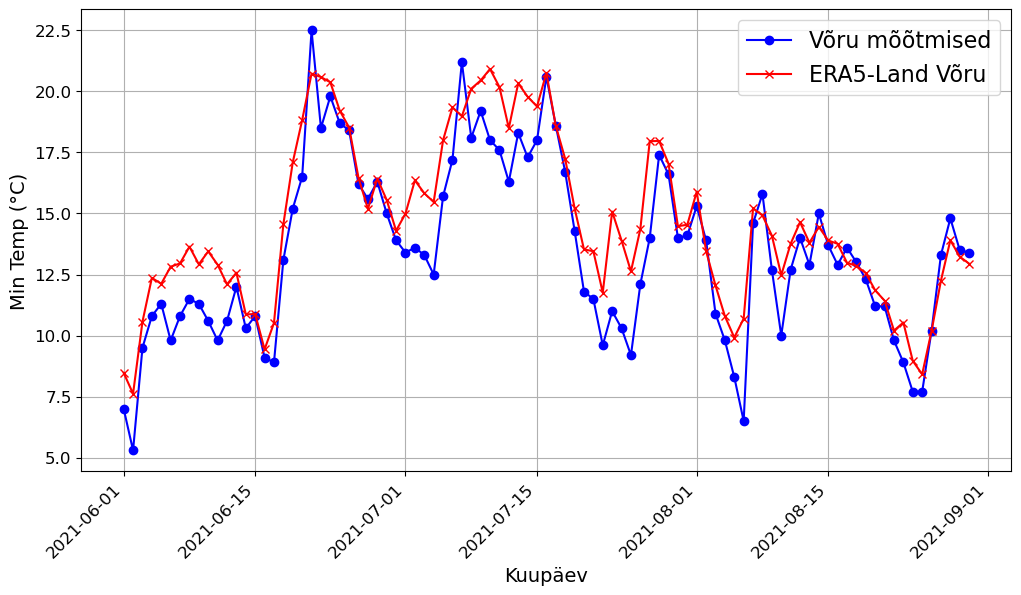

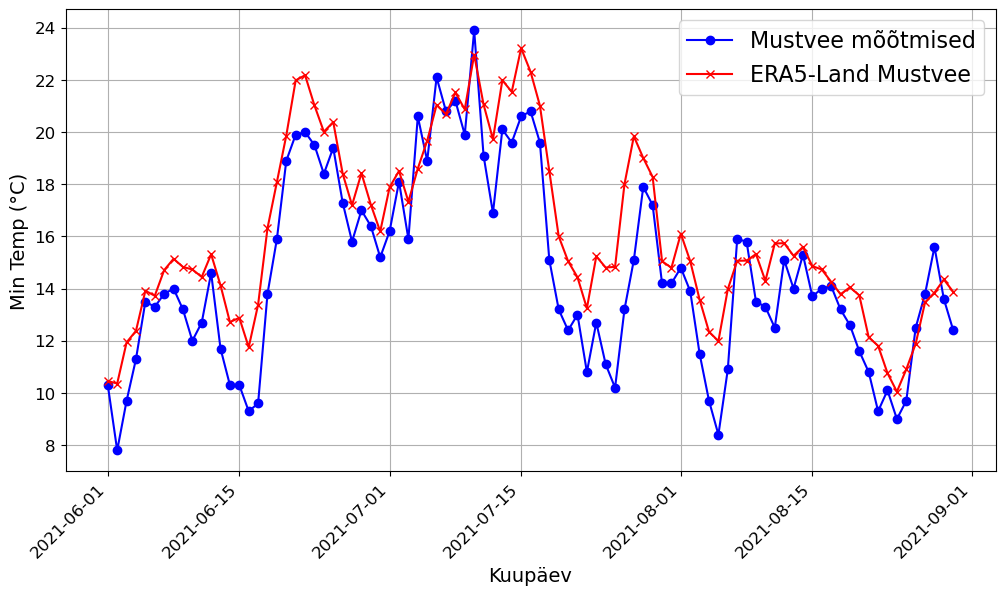

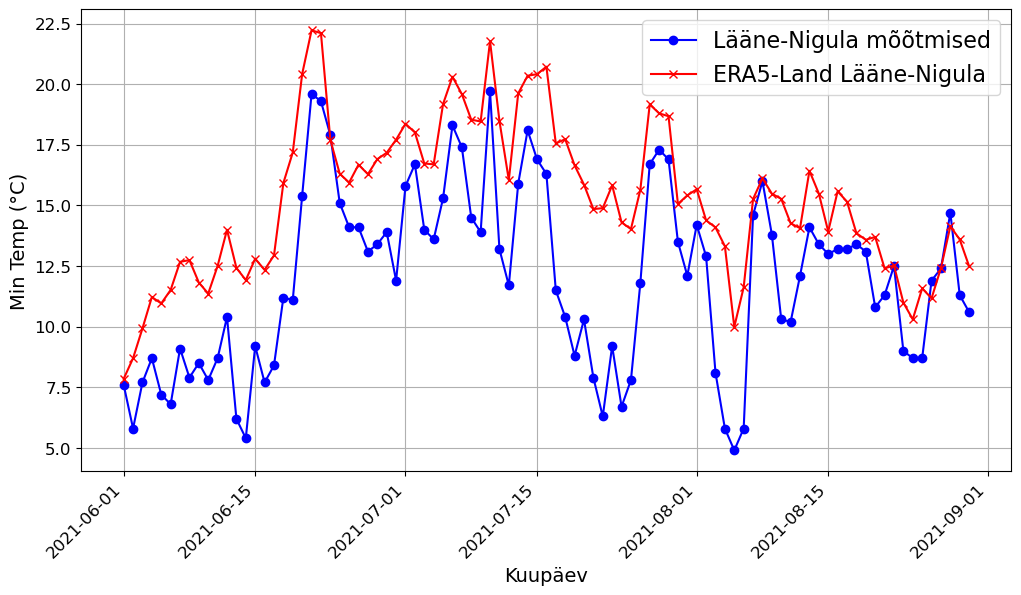

In [45]:
df_filtered_voru = df_daily_min_voru.loc["2021-06-01":"2021-08-30"]
df_filtered_laane_nigula = df_daily_min_Laane_Nigula.loc["2021-06-01":"2021-08-30"]
df_filtered_mustvee = df_daily_min_mustvee.loc["2021-06-01":"2021-08-30"]

#mustvee
ds_2021=era_min.sel(time="2021")
ds_2021 = ds_2021.t2m - kelvin
ds_2021_suvi = ds_EST_era_uksik_piksel(ds_2021)
ds_2021_suvi = ds_2021_suvi.sel(time=slice("2021-06", "2021-08-30"))
ds_2021_suvi = ds_2021_suvi.mean(dim=["latitude", "longitude"])

#voru
ds_2021_voru = ds_EST_era_voru(ds_2021)
ds_2021_suvi_voru = ds_2021_voru.sel(time=slice("2021-06", "2021-08-30"))
ds_2021_suvi_voru = ds_2021_suvi_voru.mean(dim=["latitude", "longitude"])

#laane_nigula
ds_2021_laane_nigula = ds_EST_era_laane_nigula(ds_2021)
ds_2021_suvi_laane_nigula = ds_2021_laane_nigula.sel(time=slice("2021-06", "2021-08-30"))
ds_2021_suvi_laane_nigula = ds_2021_suvi_laane_nigula.mean(dim=["latitude", "longitude"])



plt.figure(figsize=(12, 6))
#plt.plot(df_filtered_mustvee.index, df_filtered_mustvee.values, marker='o', linestyle='-', color='blue', label="Mustvee mõõtmised")
plt.plot(df_filtered_voru.index, df_filtered_voru.values, marker='o', linestyle='-', color='blue', label="Võru mõõtmised")
#plt.plot(df_filtered_laane_nigula.index, df_filtered_laane_nigula.values, marker='o', linestyle='-', color='blue', label="Lääne-Nigula mõõtmised")

#ds_2021_suvi.plot.line(label="ERA5-Land Mustvee",marker='x', linestyle='-', color="red")
ds_2021_suvi_voru.plot.line(label="ERA5-Land Võru",marker='x', linestyle='-', color="red")
#ds_2021_suvi_laane_nigula.plot.line(label="ERA5-Land Lääne-Nigula",marker='x', linestyle='-', color="red")

#plt.text(0.01, 0.98, 'C', transform=plt.gca().transAxes, fontsize=18, fontweight='bold', va='top')

plt.xlabel("Kuupäev", fontsize=14)
plt.ylabel("Min Temp (°C)", fontsize=14)
#plt.title("Päevane miinimum temperatuur ERA5-Land ja ilmajaama võrdlus (Jun–Aug 2021)")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.grid()
#plt.savefig("Võru.png", dpi=300, bbox_inches="tight")
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df_filtered_mustvee.index, df_filtered_mustvee.values, marker='o', linestyle='-', color='blue', label="Mustvee mõõtmised")
ds_2021_suvi.plot.line(label="ERA5-Land Mustvee",marker='x', linestyle='-', color="red")

plt.xlabel("Kuupäev", fontsize=14)
plt.ylabel("Min Temp (°C)", fontsize=14)
#plt.title("Päevane miinimum temperatuur ERA5-Land ja ilmajaama võrdlus (Jun–Aug 2021)")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.grid()
#plt.savefig("mustvee.png", dpi=300, bbox_inches="tight")
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df_filtered_laane_nigula.index, df_filtered_laane_nigula.values, marker='o', linestyle='-', color='blue', label="Lääne-Nigula mõõtmised")
ds_2021_suvi_laane_nigula.plot.line(label="ERA5-Land Lääne-Nigula",marker='x', linestyle='-', color="red")
plt.xlabel("Kuupäev", fontsize=14)
plt.ylabel("Min Temp (°C)", fontsize=14)
#plt.title("Päevane miinimum temperatuur ERA5-Land ja ilmajaama võrdlus (Jun–Aug 2021)")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.grid()
#plt.savefig("laane-nigula.png", dpi=300, bbox_inches="tight")
plt.show()


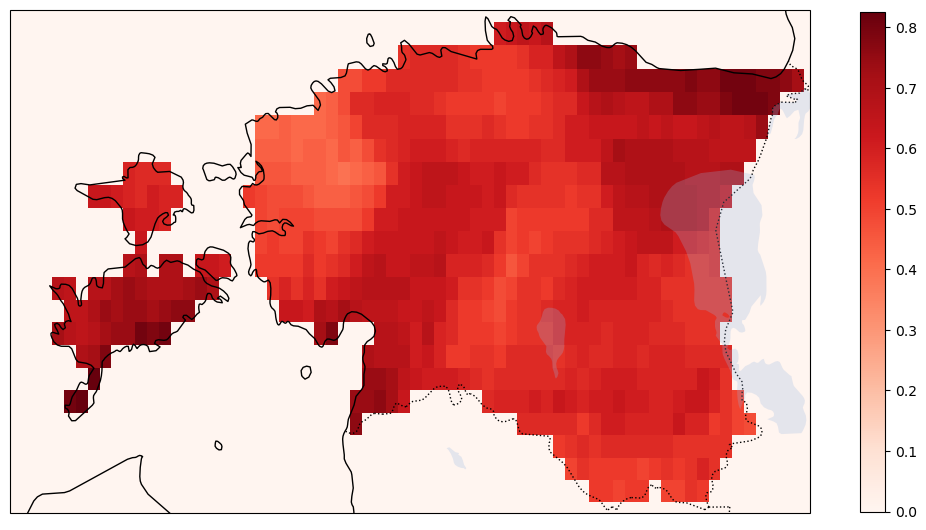

In [46]:
days_per_day_map_list=[]
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP="ssp585")
    ds_member=ds_member.sel(time=slice("2000","2022"))
    data_masked=ds_EST_koik(ds_member)
    
    days_above_20 = (data_masked >= (20+kelvin))
    days_per_day_map = days_above_20.sum(dim="time")
    
    days_per_day_map = days_per_day_map.assign_coords(member=member)
    
    days_per_day_map_list.append(days_per_day_map)
    

nights_map_combined=xr.concat(days_per_day_map_list, dim="dataset",coords="minimal",compat="override")
#siin peab olema mean, sest kui võtan iga gridi mediani siis see nullib ära palju 
nights_map_median=nights_map_combined.tasmin.median(dim="dataset")
nights_map_median=nights_map_median/23
# pilt väiksemaks nende koordinaatide järgi
extent = [21.5, 28.2, 57.5, 59.7]  # Adjust if needed

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([1,1,1,1],projection=ccrs.Mercator())
#see asi teeb pildi väiksemaks
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.coastlines()
#siin cbar:kwargs shrink muudab värvi tulba sama suuremks kui pilt 
nights_map_median.plot(transform=ccrs.PlateCarree(), cmap = 'Reds',cbar_kwargs={"shrink": 0.5, "label": ""})

plt.title("", fontsize = 20)
fig.patch.set_facecolor('xkcd:white')
#plt.savefig("CMIP6 mudelite mediaan troopilised ööd 2000-2022.png", dpi=300, bbox_inches="tight")
plt.show()

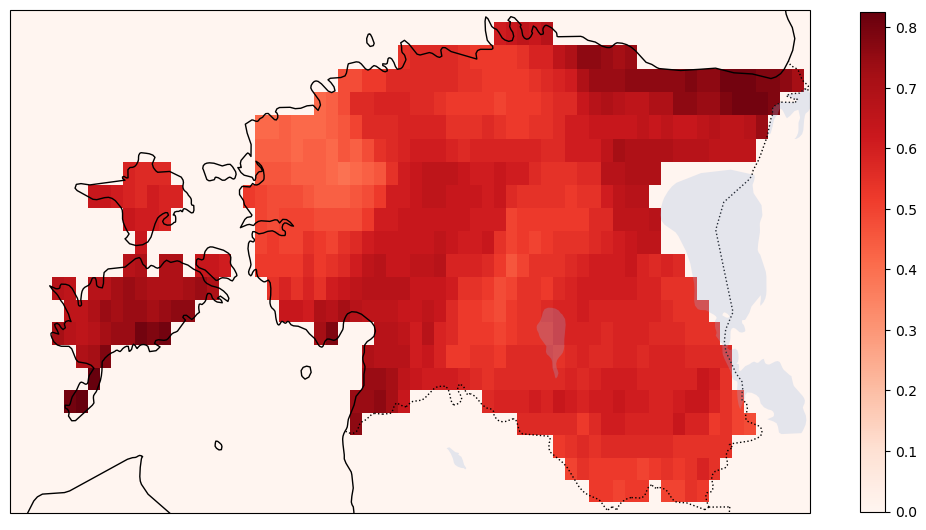

In [47]:
days_per_day_map_list=[]
for member in common_members:
    ds_member = ds_min.sel(member=member, SSP="ssp585")
    ds_member=ds_member.sel(time=slice("2000","2022"))
    data_masked=ds_EST(ds_member)
    
    days_above_20 = (data_masked >= (20+kelvin))
    days_per_day_map = days_above_20.sum(dim="time")
    
    days_per_day_map = days_per_day_map.assign_coords(member=member)
    
    days_per_day_map_list.append(days_per_day_map)
    

nights_map_combined=xr.concat(days_per_day_map_list, dim="dataset",coords="minimal",compat="override")
#siin peab olema mean, sest kui võtan iga gridi mediani siis see nullib ära palju 
nights_map_median=nights_map_combined.tasmin.median(dim="dataset")
nights_map_median=nights_map_median/23
# pilt väiksemaks nende koordinaatide järgi
extent = [21.5, 28.2, 57.5, 59.7]  # Adjust if needed

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([1,1,1,1],projection=ccrs.Mercator())
#see asi teeb pildi väiksemaks
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.coastlines()
#siin cbar:kwargs shrink muudab värvi tulba sama suuremks kui pilt 
nights_map_median.plot(transform=ccrs.PlateCarree(), cmap = 'Reds',cbar_kwargs={"shrink": 0.5, "label": ""})

plt.title("", fontsize = 20)
fig.patch.set_facecolor('xkcd:white')
#plt.savefig("CMIP6 mudelite mediaan troopilised ööd 2000-2022 peipsita.png", dpi=300, bbox_inches="tight")
plt.show()

In [48]:
ds_dense=era_min.sel(time=slice("2000","2023"))
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_50 

est_ind = countries.abbrevs.index('EST') 
est_mask = countries.mask(ds_dense['longitude'], ds_dense['latitude'])

ds_EST_peipsiga = ds_EST_era_koik(era_min.sel(time=slice("2000","2023")))
#ds_EST_peipsiga = ds_dense.where(est_mask == est_ind) 

days_above_20_2021 = (ds_EST_peipsiga >= (20+kelvin))
days_per_day_2021 = days_above_20_2021.any(dim=["longitude", "latitude"])


eramin_days_2021 = days_per_day_2021.groupby("time.year").sum()

days_per_day_2021_map = days_above_20_2021.sum(dim="time")
days_per_day_2021_map = days_per_day_2021_map / 23

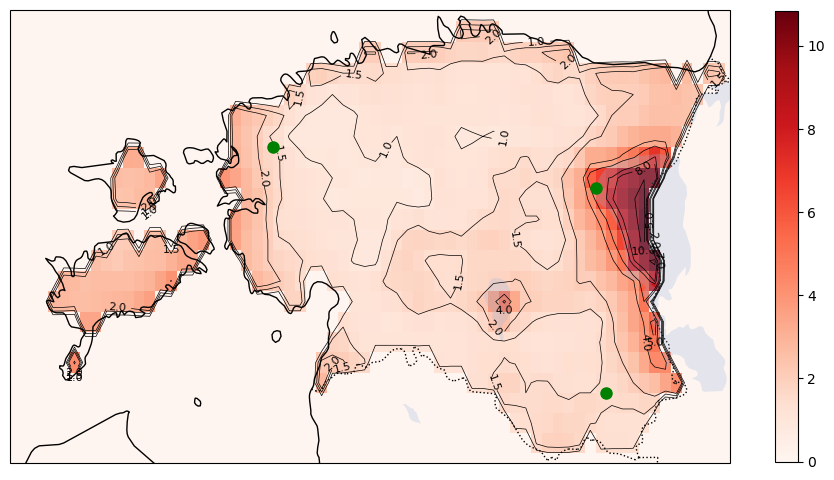

In [49]:
from matplotlib.patches import Rectangle

# Define ruutude koordinaadid
rects = [
    {"lat_range": (58.8, 58.9), "lon_range": (26.9, 27)},
    {"lat_range": (57.8, 57.9), "lon_range": (27, 27.1)},
    {"lat_range": (59.0, 59.1), "lon_range": (23.9, 24.0)},
]

# Plot setup
extent = [21.5, 28.2, 57.5, 59.7]
levels = [1, 1.5, 2, 4, 5, 7, 8, 10]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9], projection=ccrs.Mercator())
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Kaardi kujundus
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.coastlines()

# Color plot (see peab toimuma enne ruute)
days_per_day_2021_map.t2m.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds',
    cbar_kwargs={"shrink": 0.5, "label": ""}
)

# Contour lines
contours = ax.contour(
    days_per_day_2021_map.longitude, days_per_day_2021_map.latitude, days_per_day_2021_map.t2m,
    levels=levels, colors='black', linewidths=0.5, transform=ccrs.PlateCarree()
)

ax.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

for rect in rects:
    lon_center = sum(rect["lon_range"]) / 2
    lat_center = sum(rect["lat_range"]) / 2

    ax.plot(
        lon_center, lat_center,
        marker='o',
        color='green',
        markersize=8,
        transform=ccrs.PlateCarree(),
        zorder=10,
    )

# Lõpuks salvestamine ja näitamine
fig.patch.set_facecolor('xkcd:white')
#plt.savefig("ERA5-Land_troopilised_ööd_2000-2022.png", dpi=300, bbox_inches="tight")
plt.show()